# Assignment 11
## Team Members: Natalie Mollaghan, Violet Stoyanova, Sudhan Maharjan
Document Classification
It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  http://archive.ics.uci.edu/ml/datasets/Spambase

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

You may work in a small group on this project. Please include a short video with a presentation of your work. Due 4/15
Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work and personal e-mails, and hence
	the word 'george' and the area code '650' are indicators of 
	non-spam.  These are useful when constructing a personalized 
	spam filter.  One would either have to blind such non-spam 
	indicators or get a very wide collection of non-spam to 
	generate a general purpose spam filter.

        For background on spam:
        Cranor, Lorrie F., LaMacchia, Brian A.  Spam! 
        Communications of the ACM, 41(8):74-83, 1998.

5. Number of Instances: 4601 (1813 Spam = 39.4%)

6. Number of Attributes: 58 (57 continuous, 1 nominal class label)

7. Attribute Information:
The last column of 'spambase.data' denotes whether the e-mail was 
considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
Most of the attributes indicate whether a particular word or
character was frequently occuring in the e-mail.  The run-length
attributes (55-57) measure the length of sequences of consecutive 
capital letters.  For the statistical measures of each attribute, 
see the end of this file.

In [3]:
import pandas as pd
import nltk
import numpy as np
%matplotlib inline




In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/maharjansudhan/DATA620/master/spambase.data',header=None)
data.shape
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


As we can see the column names are missing and we'll refer to the attribute information to rename the columns

In [5]:
# Variable types
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
#renaming the columns
data.columns=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
              'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive',
              'word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',
              'word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
              'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
              'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
              'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
              'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
              'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
              'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
              'capital_run_length_total','spamclass']                       

In [8]:
data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spamclass
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


C:\Users\Violet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


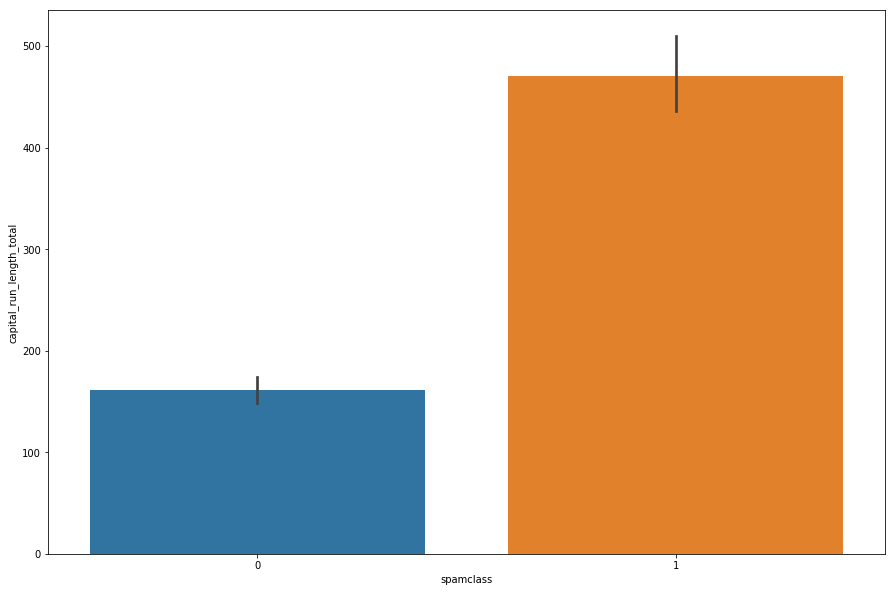

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
sns.barplot(x="spamclass", y="capital_run_length_total", data = data)

According to the barplot, we can say that there are more non spam emails than spam emails.

In [10]:
# Count the number of spam vs. not spam
c1 = len(data[data.spamclass==1])
c0 = len(data[data.spamclass==0])

print("Spam: %d" %c1)
print("Not spam: %d" %c0)

Spam: 1813
Not spam: 2788


In [11]:
# Split into test, train, and validate
percTrain = 0.7
percVal = 0.15
percTest = 0.15

N = len(data)
trainNum = int(percTrain * N)
valNum = int(percVal * N)
testNum = N - trainNum - valNum

In [12]:
# Check targets
print("Training target: %d" %trainNum)
print ("Validation target: %d" %valNum)
print ("Testing target: %d" %testNum)
print ("Total: %d" %(trainNum + valNum + testNum))

Training target: 3220
Validation target: 690
Testing target: 691
Total: 4601


In [13]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(data, test_size=testNum, random_state=8)
trainSet, valSet = train_test_split(trainSet, test_size=valNum, random_state=88)

In [14]:
# Check lengths
print("Training set: %d" %len(trainSet))
print("Validation set: %d" %len(valSet))
print("Testing set: %d" %len(testSet))
print ("Total: %d" %(len(trainSet) + len(valSet) + len(testSet)))

Training set: 3220
Validation set: 690
Testing set: 691
Total: 4601


# Decision Tree 

## Advantages:
Decision Trees are easy to explain. It results in a set of rules.
It follows the same approach as humans generally follow while making decisions.
Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
The Number of hyper-parameters to be tuned is almost null.
## Disadvantages:
There is a high probability of overfitting in Decision Tree.
Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
Calculations can become complex when there are many class labels

From: http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

In [15]:
# Decision tree
from sklearn import tree
import sklearn.metrics as sm

# Train classifier
trainSetClass = trainSet['spamclass']
trainSetVars = trainSet.drop(labels='spamclass', axis=1)
dt = tree.DecisionTreeClassifier(criterion="entropy", random_state=88)
dt_fit = dt.fit(trainSetVars, trainSetClass)

In [16]:
def model_summary(actual, pred):
    cm = sm.confusion_matrix(actual, pred, labels=[1, 0])
    print("True positives: %d" %cm[0,0])
    print ("False positives: %d" %cm[1,0])
    print ("True negatives: %d" %cm[1,1])
    print ("False negatives: %d" %cm[0,1])
    print
    print (sm.classification_report(actual, pred, labels=[1,0], target_names=["Spam", "Not spam"]))

In [17]:
# Training performance
dt_train = dt_fit.predict(trainSetVars)
model_summary(trainSetClass, dt_train)

True positives: 1260
False positives: 0
True negatives: 1958
False negatives: 2
             precision    recall  f1-score   support

       Spam       1.00      1.00      1.00      1262
   Not spam       1.00      1.00      1.00      1958

avg / total       1.00      1.00      1.00      3220



In [18]:
# Decision tree - validation set
valSetClass = valSet['spamclass']
valSetVars = valSet.drop(labels='spamclass', axis=1)

dt_val = dt_fit.predict(valSetVars)
model_summary(valSetClass, dt_val)

True positives: 252
False positives: 17
True negatives: 401
False negatives: 20
             precision    recall  f1-score   support

       Spam       0.94      0.93      0.93       272
   Not spam       0.95      0.96      0.96       418

avg / total       0.95      0.95      0.95       690



In [19]:
# Decision tree - test set
testSetClass = testSet['spamclass']
testSetVars = testSet.drop(labels='spamclass', axis=1)

dt_test = dt_fit.predict(testSetVars)
model_summary(testSetClass, dt_test)

True positives: 251
False positives: 29
True negatives: 383
False negatives: 28
             precision    recall  f1-score   support

       Spam       0.90      0.90      0.90       279
   Not spam       0.93      0.93      0.93       412

avg / total       0.92      0.92      0.92       691



In [20]:
# Check feature importance
def featImp(modelfit, setVars): 
    featFit = modelfit.feature_importances_
    df = {'Var': pd.Series(setVars.columns.values), 'Imp': pd.Series(featFit)}
    fi = pd.DataFrame(df, columns=['Var','Imp'])
    return fi.sort_values(['Imp'], ascending=0).head(10)
    

featImp(dt_fit, testSetVars)

,Var,Imp
51,char_freq_!,0.296289
52,char_freq_$,0.130370
6,word_freq_remove,0.125547
54,capital_run_length_average,0.056054
55,capital_run_length_longest,0.035736
26,word_freq_george,0.033155
56,capital_run_length_total,0.026242
24,word_freq_hp,0.025670
4,word_freq_our,0.025391
18,word_freq_you,0.024984


## Random Forrest Model

"A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models."
From: https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [21]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Violet\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# Spamclass are the values we want to predict
spamclass = np.array(data['spamclass'])

In [23]:
# Remove the spamclass from the data
# axis 1 refers to the columns
data= data.drop('spamclass', axis = 1)

# Saving data names for later use
data_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [24]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
training_data, testing_data, training_spamclass, testing_spamclass = train_test_split(data, spamclass, test_size = 0.25, random_state = 42)

In [25]:
print('Training Data Shape:', training_data.shape)
print('Training Spam Shape:', training_spamclass.shape)
print('Testing Data Shape:', testing_data.shape)
print('Testing Spam Shape:', testing_spamclass.shape)

Training Data Shape: (3450, 57)
Training Spam Shape: (3450,)
Testing Data Shape: (1151, 57)
Testing Spam Shape: (1151,)


In [26]:
# random forest model creation
rfc = RandomForestClassifier()

rfc.fit(training_data,training_spamclass)

# predictions
rfc_predict = rfc.predict(testing_data)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
rfc_cv_score = cross_val_score(rfc, data, spamclass, cv=10, scoring='roc_auc')

In [29]:
print("Confusion Matrix")
print(confusion_matrix(testing_spamclass, rfc_predict))
print('\n')
print("Classification Report")
print(classification_report(testing_spamclass, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix
[[662  14]
 [ 51 424]]


Classification Report
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       676
          1       0.97      0.89      0.93       475

avg / total       0.94      0.94      0.94      1151



All AUC Scores
[0.97631848 0.96087873 0.96585135 0.98231648 0.99007901 0.97569259
 0.99507911 0.98797996 0.96135578 0.93081005]


Mean AUC Score
Mean AUC Score - Random Forest:  0.9726361541118399


In [30]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(training_data, training_spamclass)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.6min finished


{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 260}


In [31]:
rfc = RandomForestClassifier(n_estimators=1200, max_depth=100, max_features='sqrt')
rfc.fit(training_data,training_spamclass)
rfc_predict = rfc.predict(testing_data)
rfc_cv_score = cross_val_score(rfc, data, spamclass, cv=10, scoring='roc_auc')

print("Confusion Matrix")
print(confusion_matrix(testing_spamclass, rfc_predict))
print('\n')
print("Classification Report")
print(classification_report(testing_spamclass, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix
[[662  14]
 [ 34 441]]


Classification Report
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       676
          1       0.97      0.93      0.95       475

avg / total       0.96      0.96      0.96      1151



All AUC Scores
[0.98916854 0.96645201 0.97325613 0.98725717 0.99298006 0.9875047
 0.99678211 0.99473257 0.96611551 0.92616956]


Mean AUC Score
Mean AUC Score - Random Forest:  0.9780418364793674


In [32]:
# Check feature importance
def featImp(fit, setVars): 
    featFit = rfc.feature_importances_
    df = {'Var': pd.Series(data_list), 'Imp': pd.Series(featFit)}
    fi = pd.DataFrame(df, columns=['Var','Imp'])
    return fi.sort_values(['Imp'], ascending=0).head(10)
    

featImp(rfc.fit, data)


,Var,Imp
51,char_freq_!,0.113850
52,char_freq_$,0.095123
6,word_freq_remove,0.081537
15,word_freq_free,0.070802
54,capital_run_length_average,0.063214
20,word_freq_your,0.060098
55,capital_run_length_longest,0.058759
56,capital_run_length_total,0.044816
24,word_freq_hp,0.041358
23,word_freq_money,0.031723


# Support Vector Machine (SVM)

The main reason to use an SVM instead is because the problem might not be linearly separable. In that case, we will have to use an SVM with a non linear kernel (e.g. RBF).

Another related reason to use SVMs is if you are in a highly dimensional space. For example, SVMs have been reported to work better for text classification.

But it requires a lot of time for training. So, it is not recommended when we have a large number of training examples.
From: https://discuss.analyticsvidhya.com/t/which-one-to-use-randomforest-vs-svm-vs-knn/2897/3



In [33]:
# SVM - train
from sklearn import svm

sv = svm.SVC(random_state=88)
sv_fit = sv.fit(trainSetVars, trainSetClass)

sv_train = sv_fit.predict(trainSetVars)
model_summary(trainSetClass, sv_train)

True positives: 1126
False positives: 52
True negatives: 1906
False negatives: 136
             precision    recall  f1-score   support

       Spam       0.96      0.89      0.92      1262
   Not spam       0.93      0.97      0.95      1958

avg / total       0.94      0.94      0.94      3220



In [34]:
# SVM - test set
sv_test = sv_fit.predict(testSetVars)
model_summary(testSetClass, sv_test)

True positives: 214
False positives: 61
True negatives: 351
False negatives: 65
             precision    recall  f1-score   support

       Spam       0.78      0.77      0.77       279
   Not spam       0.84      0.85      0.85       412

avg / total       0.82      0.82      0.82       691



# Conclusion
One can see that all three algorithms performed well, especially Random Forest with 94% accuracy followed by Decision Tree and SVM. 